In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score,recall_score,confusion_matrix, classification_report, accuracy_score,f1_score
from gc import callbacks
from pickletools import optimize
from tabnanny import verbose
from typing import Sequence
from sklearn.preprocessing import scale,StandardScaler
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.datasets import mnist,fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
import tensorflow as tf

In [6]:
import cv2
from tqdm import tqdm, trange
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sn
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.models import Model
import tensorflow as tf 
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import RMSprop, SGD
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

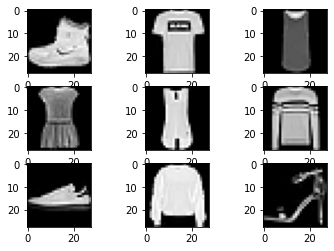

In [3]:

(X_train, y_train),(X_test,y_test)= fashion_mnist.load_data()

for i in range(9):
  plt.subplot(330+i+1 )
  plt.imshow(X_train[i],cmap = plt.get_cmap('gray'))
  
plt.show()

In [4]:



X_train = X_train.reshape (60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [7]:
model = tf.keras.Sequential()
model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(256,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(10,activation='sigmoid'))


model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=128,epochs=20,verbose=1,validation_data = (X_test, y_test))

Epoch 1/20
469/469 [==============================] - 19s 38ms/step - loss: 0.5898 - accuracy: 0.7838 - val_loss: 0.4764 - val_accuracy: 0.8153
Epoch 2/20
469/469 [==============================] - 17s 37ms/step - loss: 0.3983 - accuracy: 0.8548 - val_loss: 0.3915 - val_accuracy: 0.8570
Epoch 3/20
469/469 [==============================] - 17s 36ms/step - loss: 0.3572 - accuracy: 0.8713 - val_loss: 0.3836 - val_accuracy: 0.8695
Epoch 4/20
469/469 [==============================] - 17s 36ms/step - loss: 0.3328 - accuracy: 0.8792 - val_loss: 0.4299 - val_accuracy: 0.8518
Epoch 5/20
469/469 [==============================] - 17s 36ms/step - loss: 0.3199 - accuracy: 0.8846 - val_loss: 0.3763 - val_accuracy: 0.8786
Epoch 6/20
469/469 [==============================] - 19s 40ms/step - loss: 0.3122 - accuracy: 0.8885 - val_loss: 0.3715 - val_accuracy: 0.8728
Epoch 7/20
469/469 [==============================] - 17s 37ms/step - loss: 0.3015 - accuracy: 0.8924 - val_loss: 0.4428 - val_accuracy:

In [8]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('test accuraccy',score[1])

Test loss:  0.7026317119598389
test accuraccy 0.8621000051498413


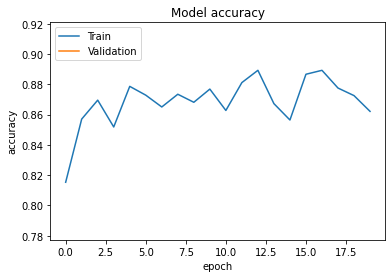

In [9]:
plt.plot([history.history['accuracy']])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')